In [ ]:
from IPython.display import Math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

# 시각화 차트 사이즈 설정
plt.rcParams['figure.figsize'] = (10, 7)

## Logistic Regression

* 선형 회귀 방식을 이용한 이진 분류 알고리즘
* 분류 레이블 : 0 or 1
* 0~1 범위를 예측 결과로 갖는 모델 필요
    * 가설 결과에 Sigmoid 함수 적용
* Logistic, sigmoid 함수
    * S자 모양의 함수

$\displaystyle s(z) = \frac{1}{1+e^{-z}}$

$z$ 값을 0과 1사이의 값으로 바꾸는 함수

**Sigmoid 함수 원리**

$\frac{1}{1} = 1$인데, 분모 1에다 0보다 크거나 같은 어떤 수를 더 하면 그 결과는 1 보다 클수 없다.

분모에 더 할 값은 $e^{-z}$, 이 값은 어떤 $z$가 주어져도 0보다 작아 지지 않는다.

$e^{-z}$는 $z$의 값이 크면 클 수록 0에 가까운 작은 수가 되고 $z$값이 작으면 무한대에 가까운 큰 수가 된다

따라서 $z$의 값이 크면 $e^{-z}$의 값이 작아져서 $\frac{1}{1+e^{-z}}$의 값은 1에 가까워 지고 그 반대는 0에 가까워 진다.

* sklearn API
    * `sklearn.linear_model.LogisticRegression`


## Sigmoid 함수 그리기

$\Large sigmoid(z) = \frac{1}{1+e^{-z}}$

`sigmoid(z)` 함수를 정의한 후 sigmoid 함수를 구현해 주세요

hint. `np.exp()`를 활용합니다.

In [ ]:
# 코드를 입력해 주세요
def sigmoid(z):
    return  

In [ ]:
# 코드검증
plt.figure(figsize=(10, 7))

x = np.arange(-10, 10)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

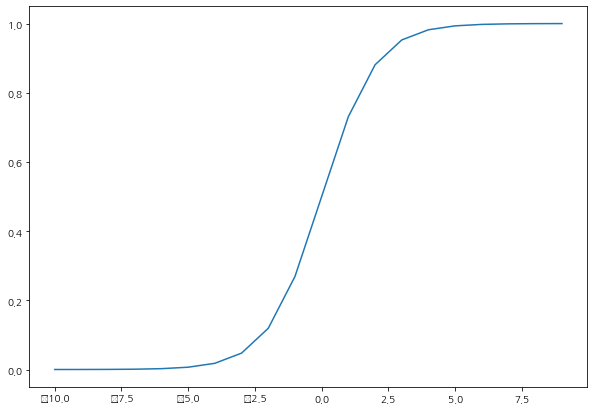

## 로지스틱 회귀 실습: 위스콘신 유방암 환자

<p><strong>[출력 결과]</strong></p><pre><Figure size 720x504 with 1 Axes></pre>

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

`load_breast_cancer()` 를 로드하여 `cancer`변수에 대입합니다.

In [ ]:
# 코드를 입력해 주세요
cancer = 

`df` 변수를 만들어 데이터프레임을 생성합니다.

In [ ]:
# 코드를 입력해 주세요
df = 

df

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mean radius</th>
      <th>mean texture</th>
      <th>mean perimeter</th>
      <th>mean area</th>
      <th>mean smoothness</th>
      <th>mean compactness</th>
      <th>mean concavity</th>
      <th>mean concave points</th>
      <th>mean symmetry</th>
      <th>mean fractal dimension</th>
      <th>...</th>
      <th>worst texture</th>
      <th>worst perimeter</th>
      <th>worst area</th>
      <th>worst smoothness</th>
      <th>worst compactness</th>
      <th>worst concavity</th>
      <th>worst concave points</th>
      <th>worst symmetry</th>
      <th>worst fractal dimension</th>
      <th>target</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>17.99</td>
      <td>10.38</td>
      <td>122.80</td>
      <td>1001.0</td>
      <td>0.11840</td>
      <td>0.27760</td>
      <td>0.30010</td>
      <td>0.14710</td>
      <td>0.2419</td>
      <td>0.07871</td>
      <td>...</td>
      <td>17.33</td>
      <td>184.60</td>
      <td>2019.0</td>
      <td>0.16220</td>
      <td>0.66560</td>
      <td>0.7119</td>
      <td>0.2654</td>
      <td>0.4601</td>
      <td>0.11890</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>20.57</td>
      <td>17.77</td>
      <td>132.90</td>
      <td>1326.0</td>
      <td>0.08474</td>
      <td>0.07864</td>
      <td>0.08690</td>
      <td>0.07017</td>
      <td>0.1812</td>
      <td>0.05667</td>
      <td>...</td>
      <td>23.41</td>
      <td>158.80</td>
      <td>1956.0</td>
      <td>0.12380</td>
      <td>0.18660</td>
      <td>0.2416</td>
      <td>0.1860</td>
      <td>0.2750</td>
      <td>0.08902</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>19.69</td>
      <td>21.25</td>
      <td>130.00</td>
      <td>1203.0</td>
      <td>0.10960</td>
      <td>0.15990</td>
      <td>0.19740</td>
      <td>0.12790</td>
      <td>0.2069</td>
      <td>0.05999</td>
      <td>...</td>
      <td>25.53</td>
      <td>152.50</td>
      <td>1709.0</td>
      <td>0.14440</td>
      <td>0.42450</td>
      <td>0.4504</td>
      <td>0.2430</td>
      <td>0.3613</td>
      <td>0.08758</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>11.42</td>
      <td>20.38</td>
      <td>77.58</td>
      <td>386.1</td>
      <td>0.14250</td>
      <td>0.28390</td>
      <td>0.24140</td>
      <td>0.10520</td>
      <td>0.2597</td>
      <td>0.09744</td>
      <td>...</td>
      <td>26.50</td>
      <td>98.87</td>
      <td>567.7</td>
      <td>0.20980</td>
      <td>0.86630</td>
      <td>0.6869</td>
      <td>0.2575</td>
      <td>0.6638</td>
      <td>0.17300</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>20.29</td>
      <td>14.34</td>
      <td>135.10</td>
      <td>1297.0</td>
      <td>0.10030</td>
      <td>0.13280</td>
      <td>0.19800</td>
      <td>0.10430</td>
      <td>0.1809</td>
      <td>0.05883</td>
      <td>...</td>
      <td>16.67</td>
      <td>152.20</td>
      <td>1575.0</td>
      <td>0.13740</td>
      <td>0.20500</td>
      <td>0.4000</td>
      <td>0.1625</td>
      <td>0.2364</td>
      <td>0.07678</td>
      <td>0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>564</th>
      <td>21.56</td>
      <td>22.39</td>
      <td>142.00</td>
      <td>1479.0</td>
      <td>0.11100</td>
      <td>0.11590</td>
      <td>0.24390</td>
      <td>0.13890</td>
      <td>0.1726</td>
      <td>0.05623</td>
      <td>...</td>
      <td>26.40</td>
      <td>166.10</td>
      <td>2027.0</td>
      <td>0.14100</td>
      <td>0.21130</td>
      <td>0.4107</td>
      <td>0.2216</td>
      <td>0.2060</td>
      <td>0.07115</td>
      <td>0</td>
    </tr>
    <tr>
      <th>565</th>
      <td>20.13</td>
      <td>28.25</td>
      <td>131.20</td>
      <td>1261.0</td>
      <td>0.09780</td>
      <td>0.10340</td>
      <td>0.14400</td>
      <td>0.09791</td>
      <td>0.1752</td>
      <td>0.05533</td>
      <td>...</td>
      <td>38.25</td>
      <td>155.00</td>
      <td>1731.0</td>
      <td>0.11660</td>
      <td>0.19220</td>
      <td>0.3215</td>
      <td>0.1628</td>
      <td>0.2572</td>
      <td>0.06637</td>
      <td>0</td>
    </tr>
    <tr>
      <th>566</th>
      <td>16.60</td>
      <td>28.08</td>
      <td>108.30</td>
      <td>858.1</td>
      <td>0.08455</td>
      <td>0.10230</td>
      <td>0.09251</td>
      <td>0.05302</td>
      <td>0.1590</td>
      <td>0.05648</td>
      <td>...</td>
      <td>34.12</td>
      <td>126.70</td>
      <td>1124.0</td>
      <td>0.11390</td>
      <td>0.30940</td>
      <td>0.3403</td>
      <td>0.1418</td>
      <td>0.2218</td>
      <td>0.07820</td>
      <td>0</td>
    </tr>
    <tr>
      <th>567</th>
      <td>20.60</td>
      <td>29.33</td>
      <td>140.10</td>
      <td>1265.0</td>
      <td>0.11780</td>
      <td>0.27700</td>
      <td>0.35140</td>
      <td>0.15200</td>
      <td>0.2397</td>
      <td>0.07016</td>
      <td>...</td>
      <td>39.42</td>
      <td>184.60</td>
      <td>1821.0</td>
      <td>0.16500</td>
      <td>0.86810</td>
      <td>0.9387</td>
      <td>0.2650</td>
      <td>0.4087</td>
      <td>0.12400</td>
      <td>0</td>
    </tr>
    <tr>
      <th>568</th>
      <td>7.76</td>
      <td>24.54</td>
      <td>47.92</td>
      <td>181.0</td>
      <td>0.05263</td>
      <td>0.04362</td>
      <td>0.00000</td>
      <td>0.00000</td>
      <td>0.1587</td>
      <td>0.05884</td>
      <td>...</td>
      <td>30.37</td>
      <td>59.16</td>
      <td>268.6</td>
      <td>0.08996</td>
      <td>0.06444</td>
      <td>0.0000</td>
      <td>0.0000</td>
      <td>0.2871</td>
      <td>0.07039</td>
      <td>1</td>
    </tr>
  </tbody>
</table>
<p>569 rows × 31 columns</p>
</div>

`scaler` 변수에 표준화(StandardScaler)를 생성하고 `target` 컬럼을 제외한 X 변수에 대한 표준화를 진행합니다.

In [ ]:
# 코드를 입력해 주세요
scaler = 
scaled = 

- 데이터셋을 분할합니다
- `random_state=10`으로 설정
- stratify 지정

In [ ]:
# train_test_split
x_train, x_test, y_train, y_test = 

`LogisticRegression`을 학습한 뒤 예측까지 진행합니다.

In [ ]:
# 코드를 입력해 주세요
lr_clf = 
lr_clf.
pred = 

`정확도(accuracy)`를 측정합니다.

In [ ]:
# 코드를 입력해 주세요


## 오차 행렬 (Confusion Matrix)

In [ ]:
from sklearn.metrics import confusion_matrix
from IPython.display import Image

In [ ]:
Image('https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg', width=700)

In [ ]:
cm = confusion_matrix(y_test, pred)

In [ ]:
cm

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap='YlOrBr', cbar=False, ax=ax)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.show()

In [ ]:
TN, FP, FN, TP = cm.ravel()

In [ ]:
TN, FP, FN, TP

## 정밀도 (Precision)

Positive로 예측한 전체 건수에서 옳게 예측한 건수의 비율

- 중요 사례: 스팸 분류 (스팸으로 분류한 메일 중에서 중요 메일이 있는 경우

In [ ]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

In [ ]:
precision = TP / (FP + TP)

In [ ]:
precision

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(y_test, pred)

## 재현율 (Recall), 민감도

실제 Positive인 전체 건수에서 옳게 예측한 건수의 비율
- 중요 사례: 암 진단 (암 환자를 건강으로 분류하는 경우)
- TPR (True Positive Rate)

In [ ]:
recall = TP / (FN + TP)

In [ ]:
recall

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_test, pred)

## F1 Score

재현율과 정밀도의 균형을 나타내는 수치

${F1 Score}=2*\: \frac{precision\:*\: recall}{precision+recall}$



In [ ]:
2 * (precision * recall) / (precision + recall)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test, pred)